# Ingest Data

In [5]:
import quandl
import numpy as np
import pandas as pd

df = quandl.get("WIKI/AAPL", start_date="1979-12-31", end_date="2016-12-31")

df.head()


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.427992,0.429779,0.427992,0.427992,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.407597,0.407597,0.405662,0.405662,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.377675,0.377675,0.375889,0.375889,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.385119,0.387054,0.385119,0.385119,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.396432,0.398219,0.396432,0.396432,18362400.0


# Profile Data

In [43]:
columns = df.columns.values

for column in columns:
        if column != "Date":
                print (column, df[column].max(), df[column].min(), df[column].mean())

Open 702.41 11.12 99.3892337891486
High 705.07 11.12 100.62762338994247
Low 699.57 11.0 98.04176346493169
Close 702.1 11.0 99.34610370533736
Volume 189560600.0 4471.0 11372202.490626378
Ex-Dividend 3.29 0.0 0.0035013233348037054
Split Ratio 7.0 1.0 1.000992501102779
Adj. Open 129.837026407 0.165539957185 17.040781480340737
Adj. High 129.919107008 0.165539957185 17.214145415241273
Adj. Low 127.413707108 0.163753554769 16.849180369892025
Adj. Close 128.519122831 0.163753554769 17.034528418197198
Adj. Volume 1855410200.0 250376.0 90793242.1801941


# K Nearest Neighbour(KNN)

In [39]:
%matplotlib inline 

import matplotlib.pyplot as plt
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")
X = (df.index - df.index[0]).days.reshape(-1,1)
y = df["Close"].values

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

knn = KNeighborsRegressor()
lr = KernelRidge()

lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
print ("KNN Score = ", knn.score(X_test, y_test))
print ("Kernel Ridge = ", lr.score(X_test, y_test))

KNN Score =  0.998671933245
Kernel Ridge =  0.336327250214


# Simple Linear Regression

Slope              :  [ 0.02111903]
Intercept          :  -40.2290233355
Mean squared error :  12560.8623581
Variance score     :  0.361132565553


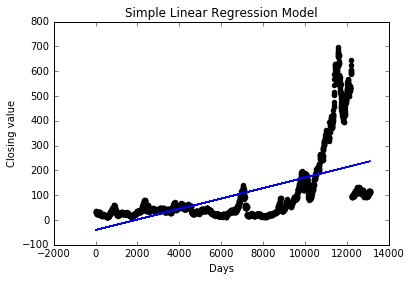

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm.fit(X_train , y_train)
mse1 = mean_squared_error(lm.predict(X_test),y_test)
mse1_train = mean_squared_error(lm.predict(X_train),y_train)
Score_test = lm.score(X_test, y_test)

print ("Slope              : ",lm.coef_) 
print ("Intercept          : ",lm.intercept_)
print ("Mean squared error : ", mse1)
print ("Variance score     : ",Score_test)
plt.scatter(X_test, y_test,color='black')
plt.plot(X_test,lm.predict(X_test),color='blue')
plt.title('Simple Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('Closing value')
plt.show()

# Linear Regression Lasso

Slope              :  [ 0.02205229]
Intercept          :  -44.3869919129
Mean squared error :  11718.1079356
Variance score     :  0.340548143845


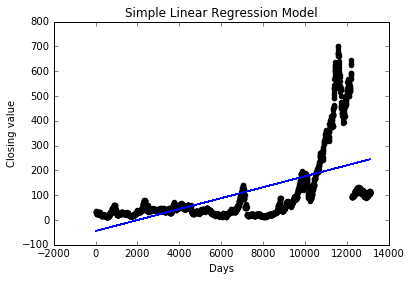

In [33]:
from sklearn import linear_model as lm
regr = lm.Lasso()
scores = [regr.fit(X_train, y_train
            ).score(X_test, y_test)]

regr.fit(X_train, y_train)
mse1 = mean_squared_error(regr.predict(X_test),y_test)
mse1_train = mean_squared_error(regr.predict(X_train),y_train)
print ("Slope              : ",regr.coef_) 
print ("Intercept          : ",regr.intercept_)
print ("Mean squared error : ", mse1)
print ("Variance score     : ",Score_test)
plt.scatter(X_test, y_test,color='black')
plt.plot(X_test,regr.predict(X_test),color='blue')
plt.title('Simple Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('Closing value')
plt.show()

# Support Vector Machine

In [38]:
from sklearn import svm
clf = svm.SVR()
clf.fit(X_train, y_train) 
clf.predict(X_test)
Score = clf.score(X_test,y_test)
print("Score:", Score)


Score: -0.173288941931


# ARIMA MODEL

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [6]:
df.index = pd.to_datetime(df.index, format="%Y-%m")
df.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2016-11-28', '2016-11-29', '2016-11-30', '2016-12-01',
               '2016-12-02', '2016-12-05', '2016-12-06', '2016-12-07',
               '2016-12-08', '2016-12-09'],
              dtype='datetime64[ns]', name='Date', length=9078, freq=None)

In [49]:
ts = df['Close']

ts.head()

Date
1980-12-12    28.75
1980-12-15    27.25
1980-12-16    25.25
1980-12-17    25.87
1980-12-18    26.63
Name: Close, dtype: float64

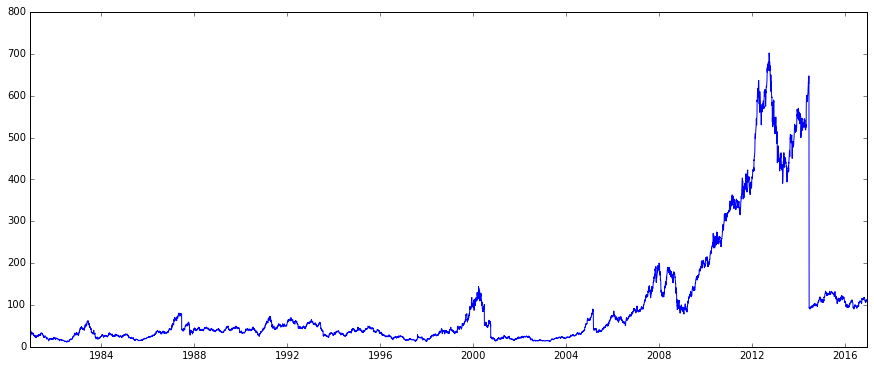

In [50]:
plt.plot(ts)

In [51]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=432)
    rolstd = pd.rolling_std(timeseries, window=432)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\MonilShah\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).mean()
C:\Users\MonilShah\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).std()


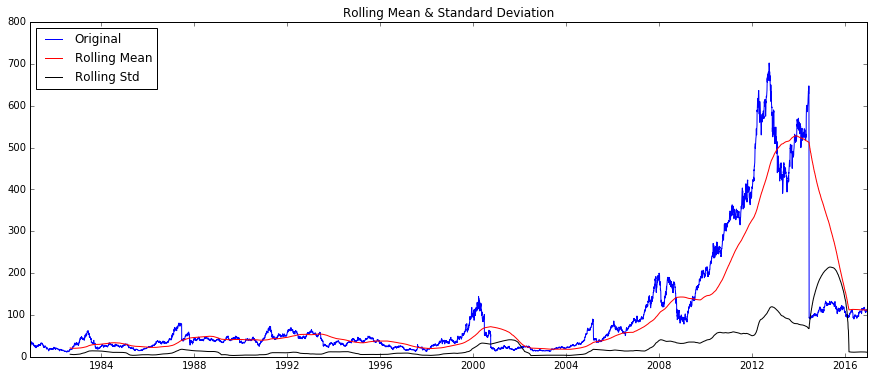

Results of Dickey-Fuller Test:
Test Statistic                   -2.342338
p-value                           0.158676
#Lags Used                        0.000000
Number of Observations Used    9077.000000
Critical Value (10%)             -2.566940
Critical Value (1%)              -3.431071
Critical Value (5%)              -2.861858
dtype: float64


In [52]:
test_stationarity(ts)

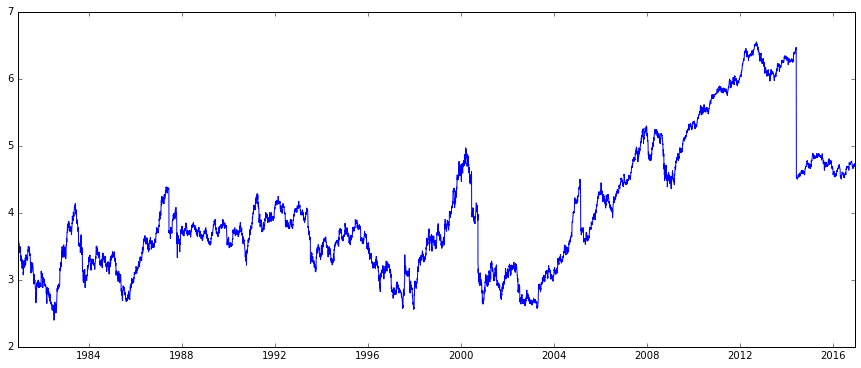

In [53]:
ts_log = np.log(ts)
plt.plot(ts_log)

C:\Users\MonilShah\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).mean()
  if __name__ == '__main__':


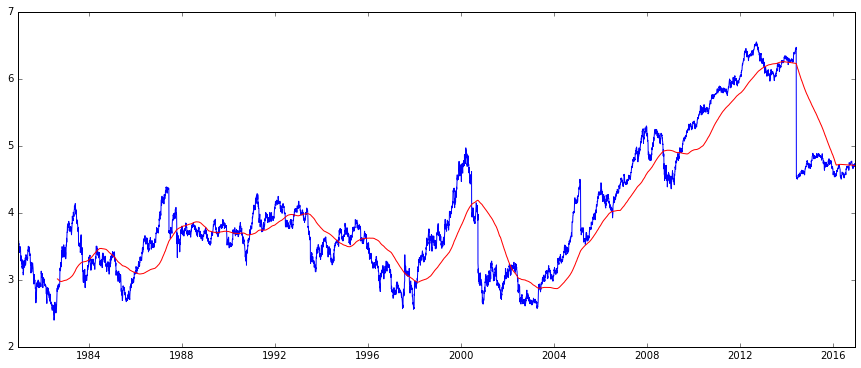

In [54]:
moving_avg = pd.rolling_mean(ts_log,432)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [55]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(432)

Date
1980-12-12         NaN
1980-12-15         NaN
1980-12-16         NaN
1980-12-17         NaN
1980-12-18         NaN
1980-12-19         NaN
1980-12-22         NaN
1980-12-23         NaN
1980-12-24         NaN
1980-12-26         NaN
1980-12-29         NaN
1980-12-30         NaN
1980-12-31         NaN
1981-01-02         NaN
1981-01-05         NaN
1981-01-06         NaN
1981-01-07         NaN
1981-01-08         NaN
1981-01-09         NaN
1981-01-12         NaN
1981-01-13         NaN
1981-01-14         NaN
1981-01-15         NaN
1981-01-16         NaN
1981-01-19         NaN
1981-01-20         NaN
1981-01-21         NaN
1981-01-22         NaN
1981-01-23         NaN
1981-01-26         NaN
                ...   
1982-07-20         NaN
1982-07-21         NaN
1982-07-22         NaN
1982-07-23         NaN
1982-07-26         NaN
1982-07-27         NaN
1982-07-28         NaN
1982-07-29         NaN
1982-07-30         NaN
1982-08-02         NaN
1982-08-03         NaN
1982-08-04         NaN
1982-0

C:\Users\MonilShah\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).mean()
C:\Users\MonilShah\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).std()


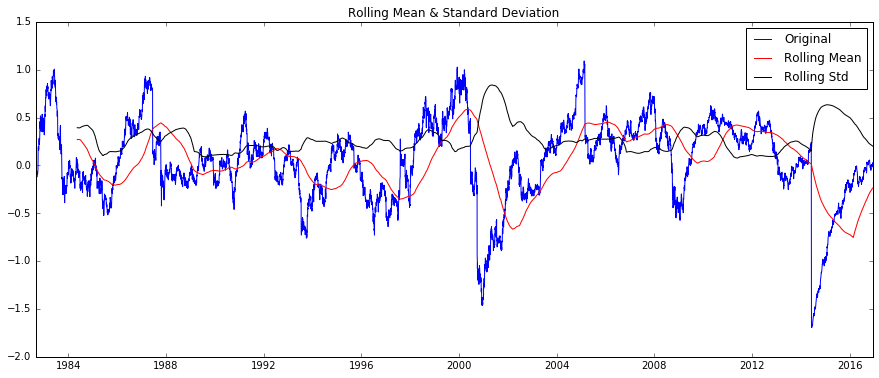

Results of Dickey-Fuller Test:
Test Statistic                   -4.142572
p-value                           0.000823
#Lags Used                        4.000000
Number of Observations Used    8642.000000
Critical Value (10%)             -2.566948
Critical Value (1%)              -3.431107
Critical Value (5%)              -2.861875
dtype: float64


In [56]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\Users\MonilShah\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,ignore_na=False,halflife=432,adjust=True).mean()
  if __name__ == '__main__':


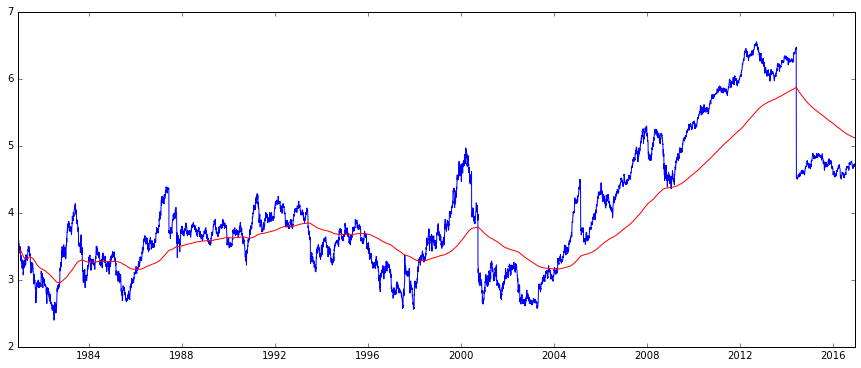

In [57]:
expwighted_avg = pd.ewma(ts_log, halflife=432)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

C:\Users\MonilShah\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).mean()
C:\Users\MonilShah\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).std()


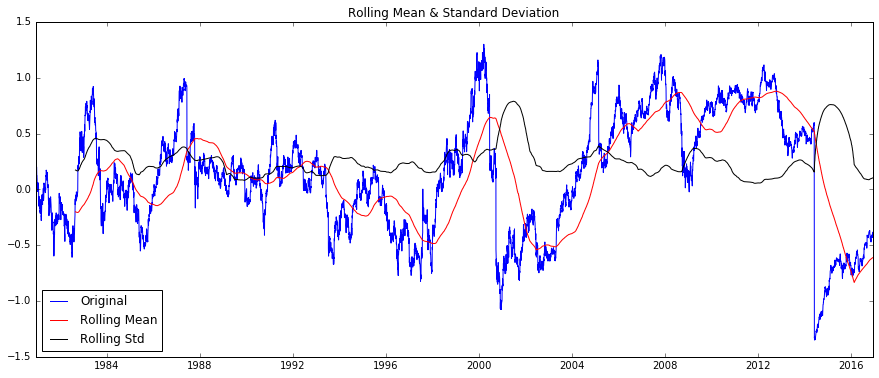

Results of Dickey-Fuller Test:
Test Statistic                   -3.386775
p-value                           0.011418
#Lags Used                        4.000000
Number of Observations Used    9073.000000
Critical Value (10%)             -2.566940
Critical Value (1%)              -3.431071
Critical Value (5%)              -2.861859
dtype: float64


In [58]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

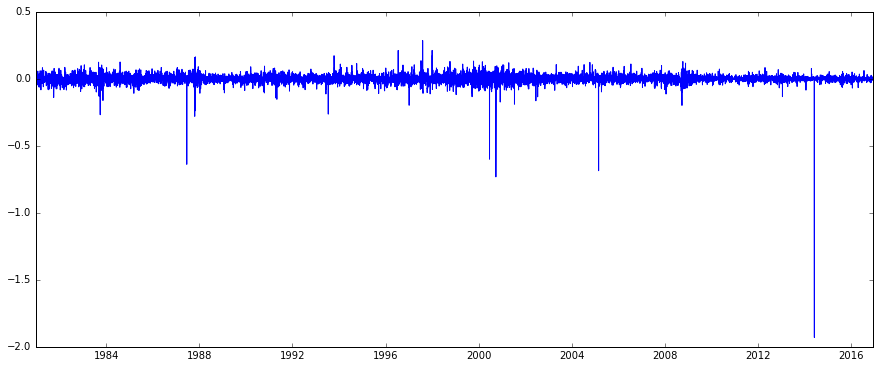

In [59]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\MonilShah\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).mean()
C:\Users\MonilShah\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).std()


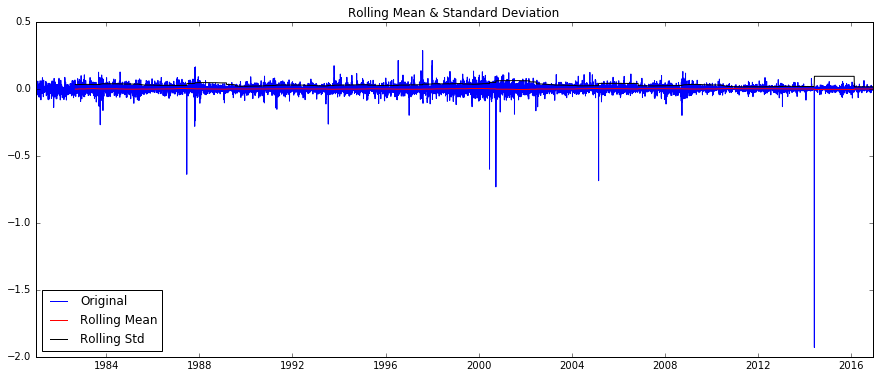

Results of Dickey-Fuller Test:
Test Statistic                  -47.656371
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    9073.000000
Critical Value (10%)             -2.566940
Critical Value (1%)              -3.431071
Critical Value (5%)              -2.861859
dtype: float64


In [60]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

C:\Users\MonilShah\Anaconda3\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


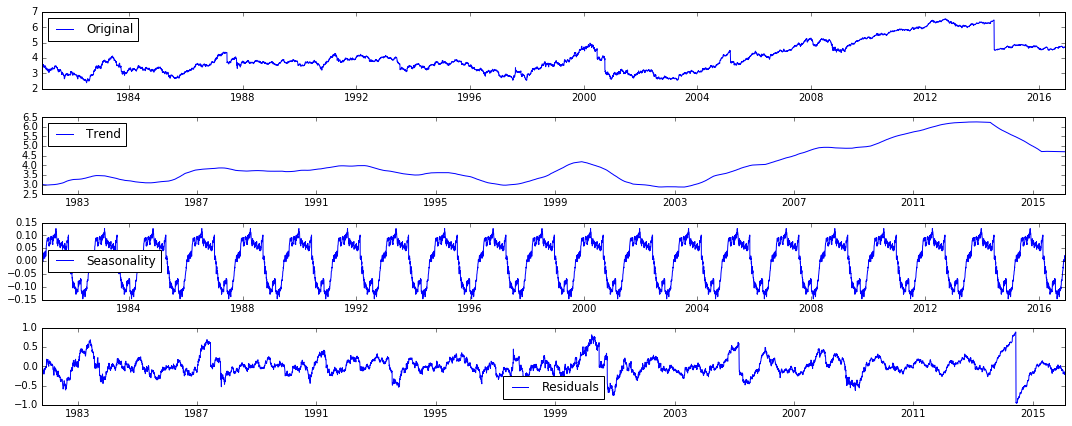

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=432)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\MonilShah\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).mean()
C:\Users\MonilShah\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).std()


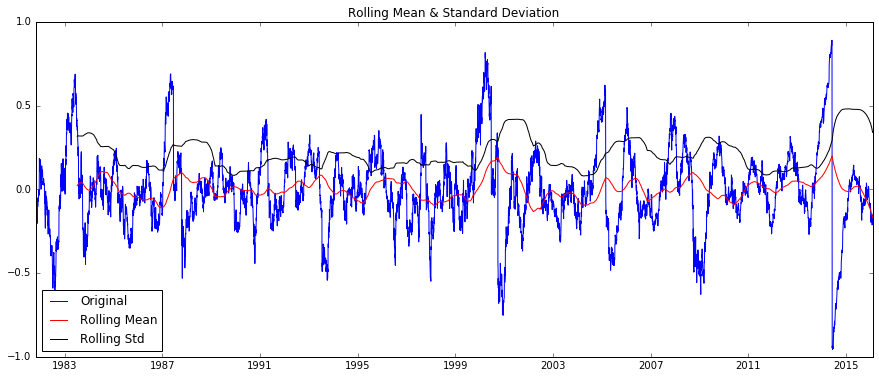

Results of Dickey-Fuller Test:
Test Statistic                -7.616439e+00
p-value                        2.185520e-11
#Lags Used                     6.000000e+00
Number of Observations Used    8.639000e+03
Critical Value (10%)          -2.566948e+00
Critical Value (1%)           -3.431107e+00
Critical Value (5%)           -2.861875e+00
dtype: float64


In [69]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Stock Forecasting using ARIMA model

In [103]:
from statsmodels.tsa.stattools import acf, pacf

In [87]:
lag_acf = acf(ts_log_diff, nlags=50)
lag_pacf = pacf(ts_log_diff, nlags=50, method='ols')

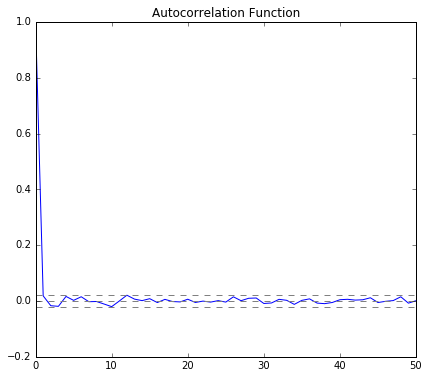

In [88]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

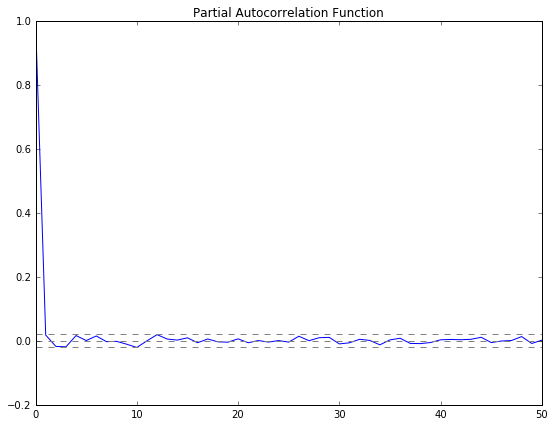

In [89]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

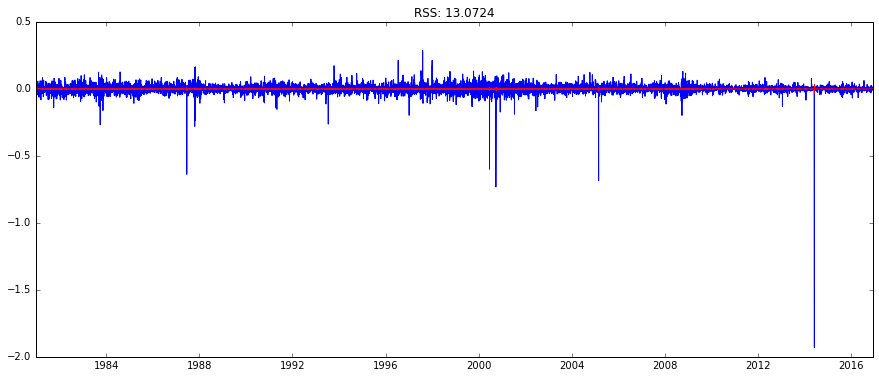

In [90]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2, 1, 0),freq='B')  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

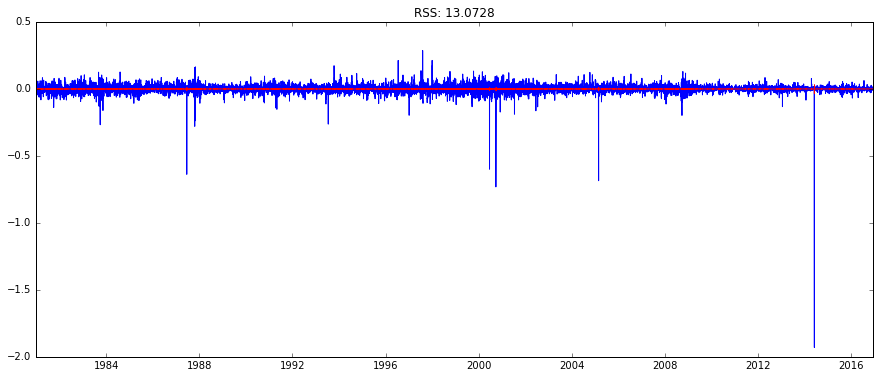

In [91]:
model = ARIMA(ts_log, order=(0, 1, 2), freq = 'B')  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

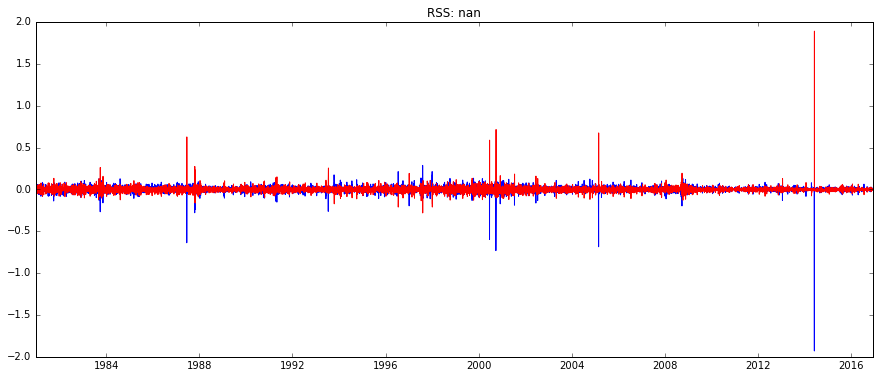

In [133]:
model = ARIMA(ts_log, order=(2, 2, 2), freq ='B')  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [134]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
1980-12-16    4.698726e-08
1980-12-17    1.112983e-02
1980-12-18   -5.820536e-02
1980-12-19   -4.722804e-02
1980-12-22   -6.145841e-02
dtype: float64


In [135]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
1980-12-16    4.698726e-08
1980-12-17    1.112987e-02
1980-12-18   -4.707549e-02
1980-12-19   -9.430353e-02
1980-12-22   -1.557619e-01
dtype: float64


In [136]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
1980-12-12    3.358638
1980-12-15    3.358638
1980-12-16    3.358638
1980-12-17    3.369768
1980-12-18    3.311562
dtype: float64

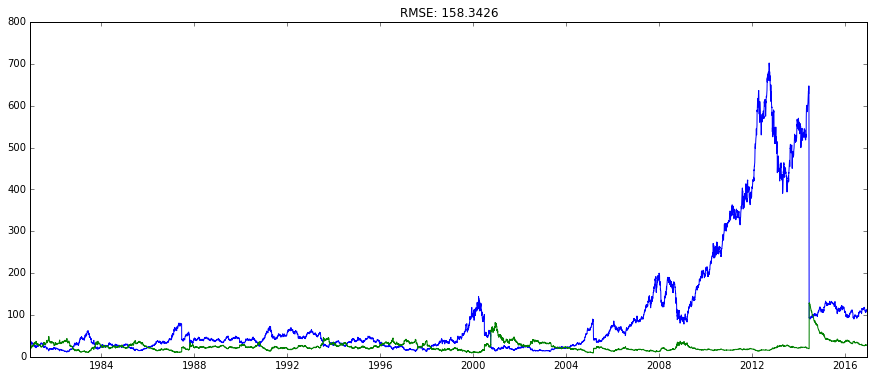

In [137]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))